In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [3]:
TRAIN_DIR = "/content/drive/MyDrive/cat emotion dataset/IMAGES/train"
VALID_DIR = "/content/drive/MyDrive/cat emotion dataset/IMAGES/valid"

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS_INITIAL = 25    # first training
EPOCHS_FINE = 25       # fine-tuning


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

valid_data = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 502 images belonging to 7 classes.
Found 169 images belonging to 7 classes.


In [5]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

base_model.trainable = False  # IMPORTANT


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_initial = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS_INITIAL
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 394s 12s/step - accuracy: 0.1531 - loss: 2.3097 - val_accuracy: 0.1302 - val_loss: 2.2063
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.2340 - loss: 1.9108 - val_accuracy: 0.1953 - val_loss: 2.0592
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.3037 - loss: 1.7693 - val_accuracy: 0.2426 - val_loss: 1.9507
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.3851 - loss: 1.5792 - val_accuracy: 0.2308 - val_loss: 1.9425
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.4208 - loss: 1.5229 - val_accuracy: 0.2604 - val_loss: 1.8834
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.5066 - loss: 1.4177 - val_accuracy: 0.2899 - val_loss: 1.7715
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.5595 - loss: 1.3439 - val_accuracy: 0.3314 - val_loss: 1.7785
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.5437 - loss: 1.3248 - val_accuracy: 0

**fine tune the model**

In [8]:
base_model.trainable = True

# Freeze first 100 layers, fine-tune the rest
for layer in base_model.layers[:100]:
    layer.trainable = False


In [9]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # VERY SMALL LR
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [10]:
history_fine = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=EPOCHS_FINE
)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 728ms/step - accuracy: 0.3784 - loss: 1.6298 - val_accuracy: 0.4379 - val_loss: 1.5703
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.4837 - loss: 1.3627 - val_accuracy: 0.4497 - val_loss: 1.6237
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.5586 - loss: 1.2314 - val_accuracy: 0.4201 - val_loss: 1.6650
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.6383 - loss: 1.0279 - val_accuracy: 0.4260 - val_loss: 1.6951
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6228 - loss: 1.0287 - val_accuracy: 0.4260 - val_loss: 1.7132
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.7090 - loss: 0.9871 - val_accuracy: 0.4260 - val_loss: 1.7289
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.7094 - loss: 0.8978 - val_accuracy: 0.4320 - val_loss: 1.7496
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.6773 - loss: 0.9319 - val_accuracy: 0

In [11]:
model.save("/content/drive/MyDrive/cat emotion dataset/cat_emotion_image_model_finetuned.keras")
print("✅ Fine-tuned model saved to Google Drive")


✅ Fine-tuned model saved to Google Drive


prediction


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt



In [16]:
MODEL_PATH = "/content/drive/MyDrive/cat emotion dataset/cat_emotion_image_model_finetuned.keras"

IMAGE_PATHS = [
    "/content/drive/MyDrive/cat emotion dataset/test images/1.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/2.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/3.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/4.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/5.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/6.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/7.jpeg",
    "/content/drive/MyDrive/cat emotion dataset/test images/8.jpeg",

]

IMG_SIZE = (128, 128)

CLASS_NAMES = [
    "Angry",
    "Disgusted",
    "Happy",
    "Normal",
    "Sad",
    "Scared",
    "Surprised"
]


In [17]:
model = load_model(MODEL_PATH)
print("✅ Fine-tuned image model loaded")


✅ Fine-tuned image model loaded


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


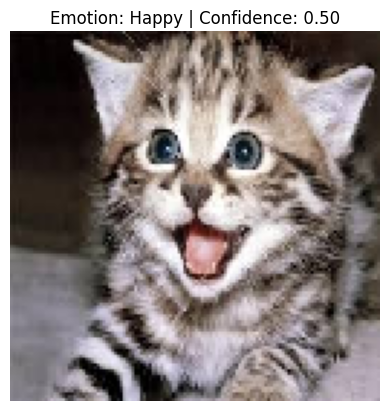

Image: 1.jpeg
Predicted Emotion: Happy
Confidence: 0.4971065819263458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


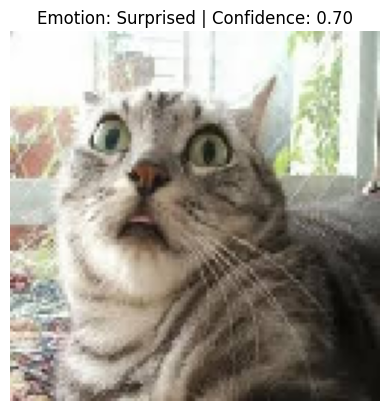

Image: 2.jpeg
Predicted Emotion: Surprised
Confidence: 0.7045989632606506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


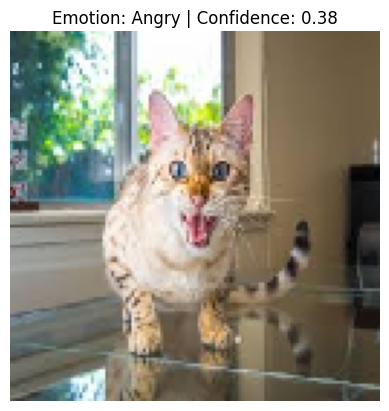

Image: 3.jpeg
Predicted Emotion: Angry
Confidence: 0.3787004351615906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


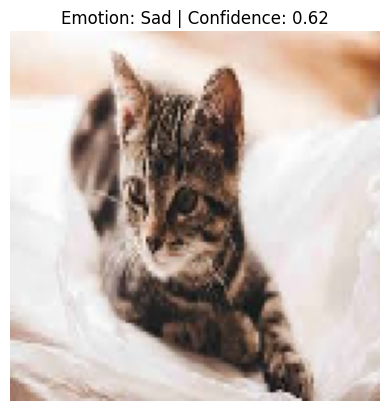

Image: 4.jpeg
Predicted Emotion: Sad
Confidence: 0.6243796348571777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


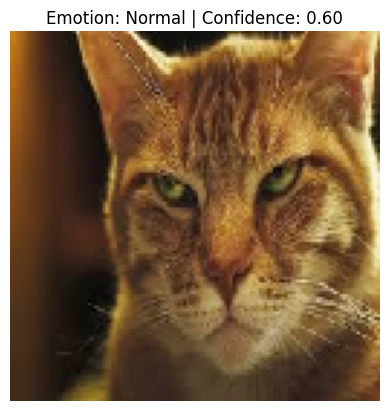

Image: 5.jpeg
Predicted Emotion: Normal
Confidence: 0.600084662437439
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


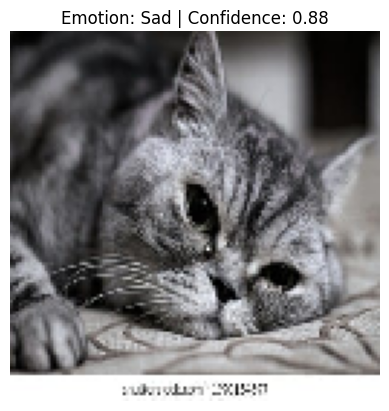

Image: 6.jpeg
Predicted Emotion: Sad
Confidence: 0.8774551153182983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


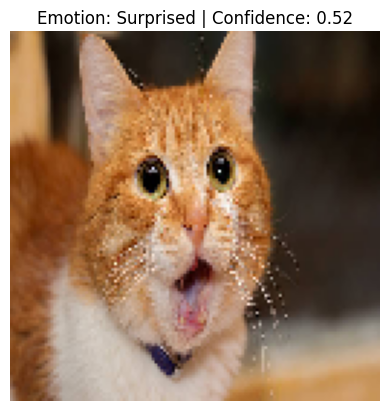

Image: 7.jpeg
Predicted Emotion: Surprised
Confidence: 0.5230996012687683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


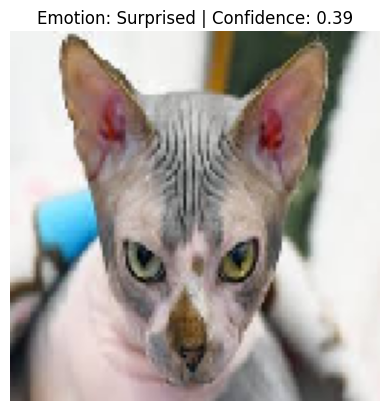

Image: 8.jpeg
Predicted Emotion: Surprised
Confidence: 0.3856161832809448


In [18]:
for img_path in IMAGE_PATHS:
    # Load image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    idx = np.argmax(predictions)
    emotion = CLASS_NAMES[idx]
    confidence = float(predictions[0][idx])

    # Display image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Emotion: {emotion} | Confidence: {confidence:.2f}")
    plt.show()

    # Print text output also
    print("Image:", img_path.split("/")[-1])
    print("Predicted Emotion:", emotion)
    print("Confidence:", confidence)

